## task 02 : ##
Un algorithme de clustering K-means pour regrouper les clients d'un magasin de détail en fonction de leur historique d'achats.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("mall_Customers.csv")

In [6]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
data["Annual Income (k$)"].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

Aprés exploration du dataset en remarque l'absence de valeurs manquantes.

Passons maintenant aux étapes pour créer un modèle de K-means pour segmenter les clients selon leur profil d'achat.

pour le k-means on utilise généralement des caractéristiques numériques, dans notre cas on a deux caractéristiques pertinents:
Income (k$) et Spending Score (1-100)    

In [10]:
# Sélectionner les caractéristiques pertinentes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

Ensuite en utilise la méthode Elbow qui aide à déterminer le nombre de clusters (k) optimal

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

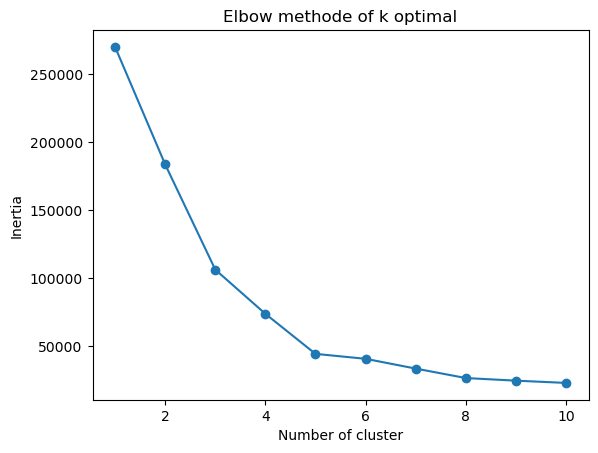

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculer l'inertie pour différentes valeurs de k
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#visualiser le graphe 
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow methode of k optimal')
plt.show()

D'après le graphe on choisie K=5 comme k-optimal

In [13]:
# Appliquer K-means avec le nombre de clusters optimal
k_optimal = 5
kmeans = KMeans(n_clusters = k_optimal , random_state = 42)
data['cluster'] = kmeans.fit_predict(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


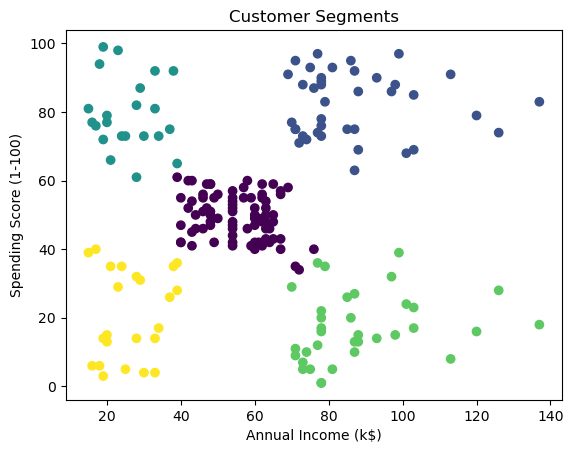

In [18]:
# Visualiser les clusters
plt.scatter(data["Annual Income (k$)"], data ["Spending Score (1-100)"], c = data['cluster'], cmap = 'viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()